In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00


In [38]:
# Importing required libraries
import fastf1
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import fastf1.plotting

In [48]:
# Load a specific race session (example: 2024, 7th race, qualifying)
session = fastf1.get_session(2024, 7, 'R')
session.load()

# Extract telemetry data for the top ten drivers
top_drivers = ['VER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'PIA', 'PER', 'ALO', 'STR']
driver_telemetry = []

for driver in top_drivers:
    driver_laps = session.laps.pick_driver(driver)
    telemetry = driver_laps.get_telemetry()
    telemetry['Driver'] = driver
    driver_telemetry.append(telemetry)

# Combine telemetry data for all drivers
data = pd.concat(driver_telemetry)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:

In [49]:
session.event

RoundNumber                                                          7
Country                                                          Italy
Location                                                         Imola
OfficialEventName    FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...
EventDate                                          2024-05-19 00:00:00
EventName                                    Emilia Romagna Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2024-05-17 13:30:00+02:00
Session1DateUtc                                    2024-05-17 11:30:00
Session2                                                    Practice 2
Session2Date                                 2024-05-17 17:00:00+02:00
Session2DateUtc                                    2024-05-17 15:00:00
Session3                                                    Practice 3
Sessio

In [50]:
data

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,Driver
2,2024-05-19 13:03:16.594,0 days 00:55:36.608000,,0.111111,0 days 00:00:00,10098,0,1,15,True,1,interpolation,0.002728,8.895927e-09,OnTrack,-3483.039335,-1694.000001,793.999999,VER
3,2024-05-19 13:03:16.675,0 days 00:55:36.689000,,0.111111,0 days 00:00:00.081000,10088,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-3483.107522,-1694.000003,793.999996,VER
4,2024-05-19 13:03:16.875,0 days 00:55:36.889000,,0.111111,0 days 00:00:00.281000,10059,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-3483.013049,-1694.000000,794.000000,VER
5,2024-05-19 13:03:16.884,0 days 00:55:36.898000,,0.111111,0 days 00:00:00.290000,9219,2,1,15,True,1,pos,0.003590,1.170713e-08,OnTrack,-3483.000000,-1694.000000,794.000000,VER
6,2024-05-19 13:03:17.204,0 days 00:55:37.218000,,0.111111,0 days 00:00:00.610000,8379,4,1,15,True,1,pos,0.448473,1.462567e-06,OnTrack,-3484.000000,-1694.000000,794.000000,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39586,2024-05-19 14:30:01.212,0 days 02:22:21.226000,,1230.013889,0 days 01:26:44.618000,11518,279,7,100,False,0,car,306159.279444,9.998668e-01,OnTrack,-1145.669797,-1590.879075,784.407121,STR
39587,2024-05-19 14:30:01.352,0 days 02:22:21.366000,,1230.013889,0 days 01:26:44.758000,11567,280,7,99,False,0,pos,306170.178948,9.999024e-01,OnTrack,-1251.000000,-1593.000000,785.000000,STR
39588,2024-05-19 14:30:01.492,0 days 02:22:21.506000,,1230.013889,0 days 01:26:44.898000,11617,281,7,99,False,0,car,306181.135000,9.999382e-01,OnTrack,-1345.277051,-1596.315430,784.965640,STR
39589,2024-05-19 14:30:01.571,0 days 02:22:21.585000,,1230.013889,0 days 01:26:44.977000,11652,282,7,99,False,0,pos,306187.346095,9.999585e-01,OnTrack,-1400.000000,-1599.000000,785.000000,STR


In [66]:
data['Acceleration'] = data['Speed'].diff().fillna(0) / data['Time'].diff().dt.total_seconds().fillna(1)
data['RelativeSpeed'] = data['Speed'] - data['DistanceToDriverAhead']
data['ControlIntensity'] = data['Throttle'] - data['Brake']
data['DeltaX'] = data['X'].diff()
data['DeltaY'] = data['Y'].diff()
data['DistanceTraveled'] = (data['DeltaX']**2 + data['DeltaY']**2)**0.5
data['GearChange'] = data['nGear'].diff().fillna(0)
data['RPMChange'] = data['RPM'].diff().fillna(0)

count    392605.000000
mean        213.436395
std          64.187079
min           0.000000
25%         159.000000
50%         221.000000
75%         267.000000
max         350.000000
Name: Speed, dtype: float64


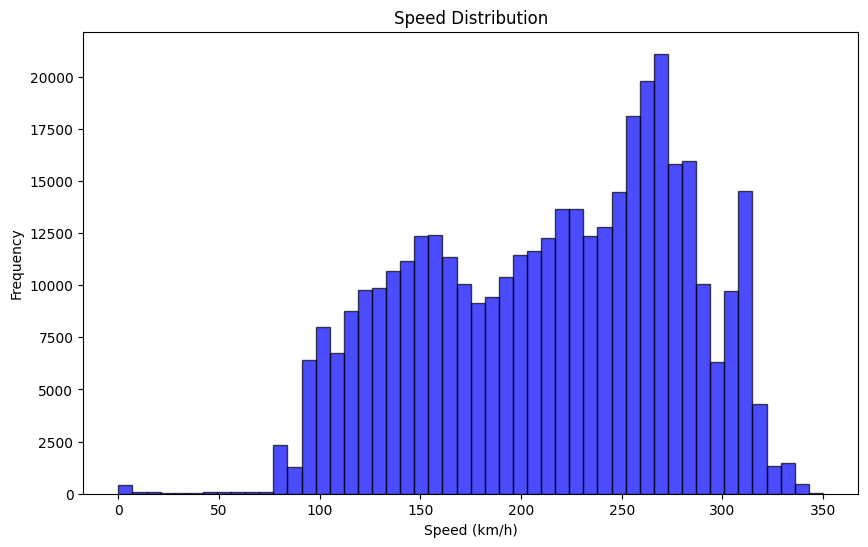

In [67]:
# Basic descriptive statistics
print(data['Speed'].describe())

# Plot histogram to visualize speed distribution
plt.figure(figsize=(10, 6))
data['Speed'].plot(kind='hist', bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Speed Distribution')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

In [68]:
pivot_data

,Driver,Speed_Mean_Low-Speed,Speed_Mean_Mid-Speed,Speed_Mean_High-Speed,Speed_Std_Low-Speed,Speed_Std_Mid-Speed,Speed_Std_High-Speed,Throttle_Mean_Low-Speed,Throttle_Mean_Mid-Speed,Throttle_Mean_High-Speed,...,Gear_Std_Low-Speed,Gear_Std_Mid-Speed,Gear_Std_High-Speed,RPM_Mean_Low-Speed,RPM_Mean_Mid-Speed,RPM_Mean_High-Speed,RPM_Std_Low-Speed,RPM_Std_Mid-Speed,RPM_Std_High-Speed,Cluster
0,ALO,69.802083,122.097303,228.626249,21.373364,17.763468,41.365486,56.843750,30.546038,76.733722,...,0.428052,0.578504,1.222671,6602.571429,8777.777237,10857.410208,861.014846,1169.931134,621.805634,0
1,HAM,70.584677,123.783424,229.868614,20.039457,17.361280,41.522979,49.068548,31.523128,77.645454,...,0.522683,0.666468,1.166275,6647.592742,8129.025472,10668.145115,850.189947,1108.458660,820.744173,1
2,LEC,69.172414,123.575659,230.477769,21.843115,16.701071,41.625042,69.250000,36.908949,78.787674,...,0.426204,0.513614,1.177823,6666.362069,8806.065983,10889.986963,1061.980078,961.577634,570.609940,1
3,NOR,69.381579,123.146553,230.278212,20.522020,17.278762,41.713146,50.780702,32.342613,73.520267,...,0.423328,0.417230,1.244677,6816.460526,8882.206435,10965.057788,886.698675,1207.510154,529.793629,0
4,PER,66.693380,122.750578,229.263551,20.563480,18.126536,41.986583,64.397213,33.050833,75.297681,...,0.622976,0.518658,1.209068,6320.634146,8300.985285,10741.345543,1421.101492,1122.852145,679.564258,3
5,PIA,69.196429,123.531816,230.167420,21.044194,17.392320,41.733397,44.375000,30.869677,74.157788,...,0.439027,0.560906,1.233188,6950.214286,8722.564611,10839.938458,1106.364968,1151.572113,554.003681,0
6,RUS,71.612472,123.981493,230.194426,18.852492,17.315110,41.613858,65.559020,32.130574,77.883337,...,0.470600,0.652038,1.248884,6907.071269,8803.758514,10930.611006,1097.573195,1120.535559,647.832996,0
7,SAI,68.233766,123.205912,230.202382,21.916579,17.234582,41.467125,73.064935,36.189532,77.897396,...,0.437039,0.785877,1.157572,6582.714286,8741.326209,10818.423897,1031.119824,990.009477,813.113591,1
8,STR,67.095652,122.499942,229.618805,24.549024,18.182811,41.032099,49.008696,33.836965,76.578002,...,0.264507,0.603867,1.225584,8155.817391,8594.237385,10804.724702,1577.138114,1119.686875,701.985668,2
9,VER,69.330396,123.357172,230.181088,20.786549,16.754956,41.219633,48.008811,32.802299,76.018877,...,0.469780,0.525621,1.166545,6842.039648,8470.222965,10698.700498,1130.192193,1091.902677,722.777004,1


In [61]:
# Segment the circuit into low-speed, mid-speed, and high-speed zones
# Define speed thresholds (example values, adjust based on track data)
data['SpeedCategory'] = pd.cut(data['Speed'], bins=[0, 80, 150, 300], labels=['Low-Speed', 'Mid-Speed', 'High-Speed'])

# Aggregate telemetry data by driver and speed category
segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(
    Speed_Mean=('Speed', 'mean'),
    Speed_Std=('Speed', 'std'),
    Throttle_Mean=('Throttle', 'mean'),
    Throttle_Std=('Throttle', 'std'),
    Brake_Mean=('Brake', 'mean'),
    Brake_Std=('Brake', 'std'),
    Gear_Mean=('nGear', 'mean'),
    Gear_Std=('nGear', 'std'),
    RPM_Mean=('RPM', 'mean'),
    RPM_Std=('RPM', 'std')
).reset_index()

# Pivot the table to make it driver-centric
pivot_data = segmented_features.pivot(index='Driver', columns='SpeedCategory', values=[
    'Speed_Mean', 'Speed_Std',
    'Throttle_Mean', 'Throttle_Std',
    'Brake_Mean', 'Brake_Std',
    'Gear_Mean', 'Gear_Std',
    'RPM_Mean', 'RPM_Std'
])

# Flatten multi-index columns for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

# Fill any missing values (if a driver has no data for a speed category)
pivot_data = pivot_data.fillna(0)

# Define features (X) for clustering
X = pivot_data.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-61-a42056dcfa06>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Mid-Speed'], cluster_data['Throttle_Mean_Mid-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Mid-Speed Zones)')
plt.ylabel('Mean Throttle (Mid-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_High-Speed'], cluster_data['Throttle_Mean_High-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (High-Speed Zones)')
plt.ylabel('Mean Throttle (High-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()


# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")

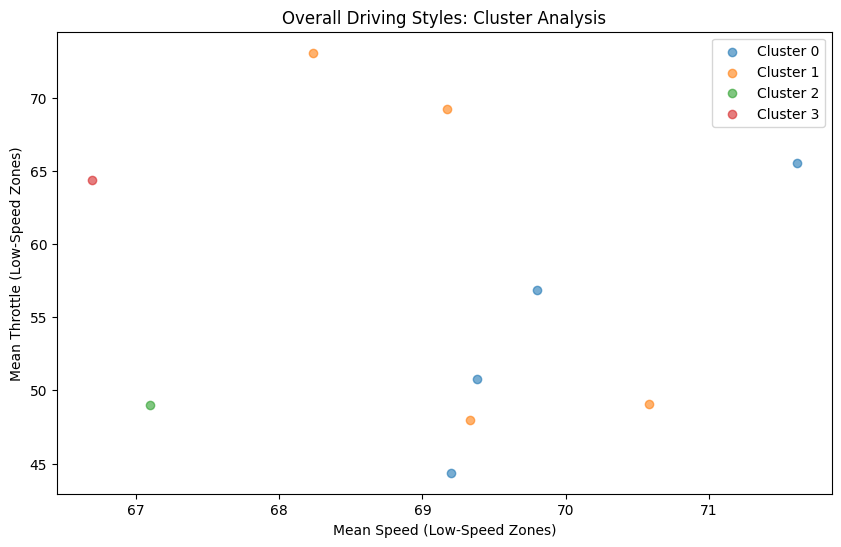

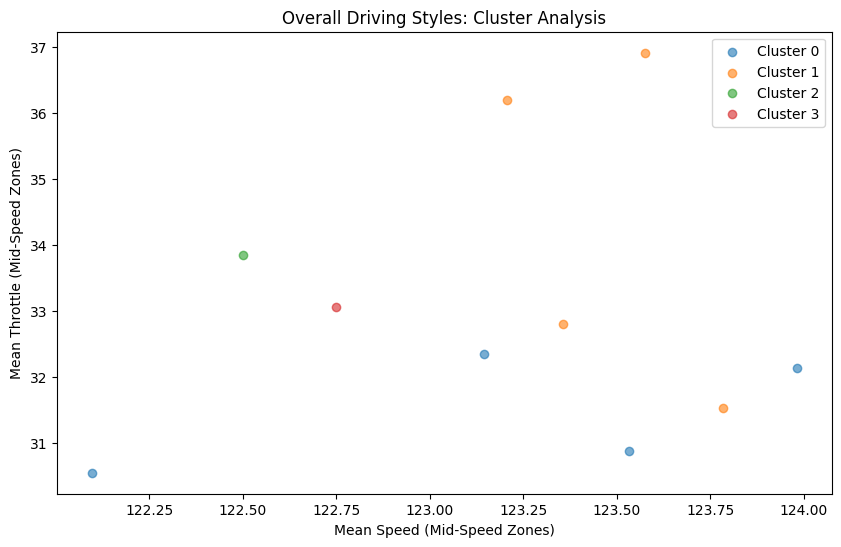

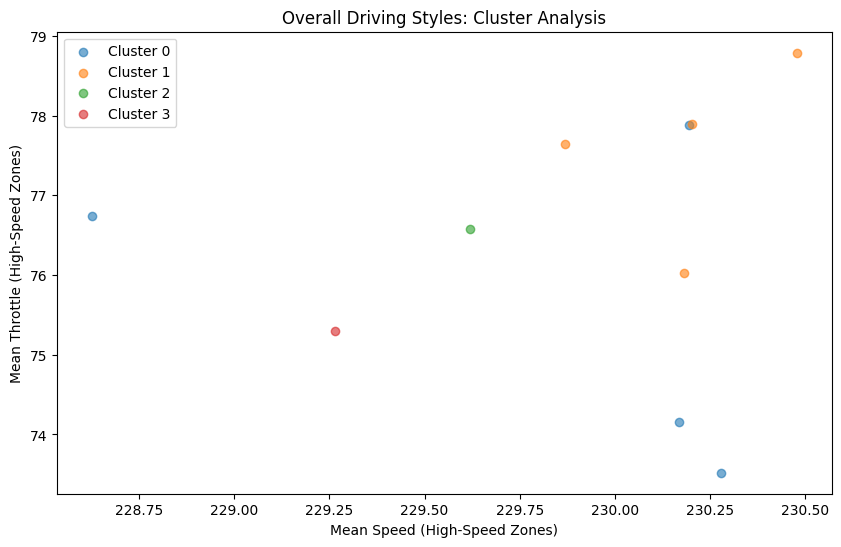

In [62]:
# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Mid-Speed'], cluster_data['Throttle_Mean_Mid-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Mid-Speed Zones)')
plt.ylabel('Mean Throttle (Mid-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_High-Speed'], cluster_data['Throttle_Mean_High-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (High-Speed Zones)')
plt.ylabel('Mean Throttle (High-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

In [54]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")

Cluster Centers (Overall Driving Styles):
   Speed_Mean_Low-Speed  Speed_Mean_Mid-Speed  Speed_Mean_High-Speed  \
0             69.998141            123.189291             229.816577   
1             69.330313            123.480542             230.182463   
2             67.095652            122.499942             229.618805   
3             66.693380            122.750578             229.263551   

   Speed_Std_Low-Speed  Speed_Std_Mid-Speed  Speed_Std_High-Speed  \
0            20.448018            17.437415             41.606472   
1            21.146425            17.012972             41.458695   
2            24.549024            18.182811             41.032099   
3            20.563480            18.126536             41.986583   

   Throttle_Mean_Low-Speed  Throttle_Mean_Mid-Speed  Throttle_Mean_High-Speed  \
0                54.389618                31.472226                 75.573779   
1                59.848074                34.355977                 77.587350   
2       

In [69]:
# Segment the circuit into low-speed, mid-speed, and high-speed zones
# Define speed thresholds (example values, adjust based on track data)
data['SpeedCategory'] = pd.cut(data['Speed'], bins=[0, 80, 150, 300], labels=['Low-Speed', 'Mid-Speed', 'High-Speed'])

# Aggregate telemetry data by driver and speed category
segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(
    Speed_Mean=('Speed', 'mean'),
    Speed_Std=('Speed', 'std'),
    Throttle_Mean=('Throttle', 'mean'),
    Brake_Mean=('Brake', 'mean'),
    RPM_Mean=('RPM', 'mean'),
    RPM_Std=('RPM', 'std'),
    GearChange_Mean=('GearChange', 'mean'),
    Acceleration_Mean=('Acceleration', 'mean'),
    ControlIntensity_Mean=('ControlIntensity', 'mean')
).reset_index()

# Pivot the table to make it driver-centric
pivot_data = segmented_features.pivot(index='Driver', columns='SpeedCategory', values=[
    'Speed_Mean', 'Throttle_Mean', 'Brake_Mean', 'RPM_Mean', 
    'Acceleration_Mean', 'ControlIntensity_Mean'
])
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

# Flatten multi-index columns for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

# Fill any missing values (if a driver has no data for a speed category)
pivot_data = pivot_data.fillna(0)

# Define features (X) for clustering
X = pivot_data.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Mid-Speed'], cluster_data['Throttle_Mean_Mid-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Mid-Speed Zones)')
plt.ylabel('Mean Throttle (Mid-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_High-Speed'], cluster_data['Throttle_Mean_High-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (High-Speed Zones)')
plt.ylabel('Mean Throttle (High-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()


# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")


<ipython-input-69-e9d52d42892b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(


KeyError: "['Driver'] not found in axis"

In [57]:
race = fastf1.get_session(2024, 7, 'R')
race.load()
laps = race.laps.pick_quicklaps()

drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']


['VER', 'NOR', 'LEC', 'PIA', 'SAI', 'HAM', 'RUS', 'PER', 'STR', 'TSU', 'HUL', 'MAG', 'RIC', 'OCO', 'ZHO', 'GAS', 'SAR', 'BOT', 'ALO', 'ALB']


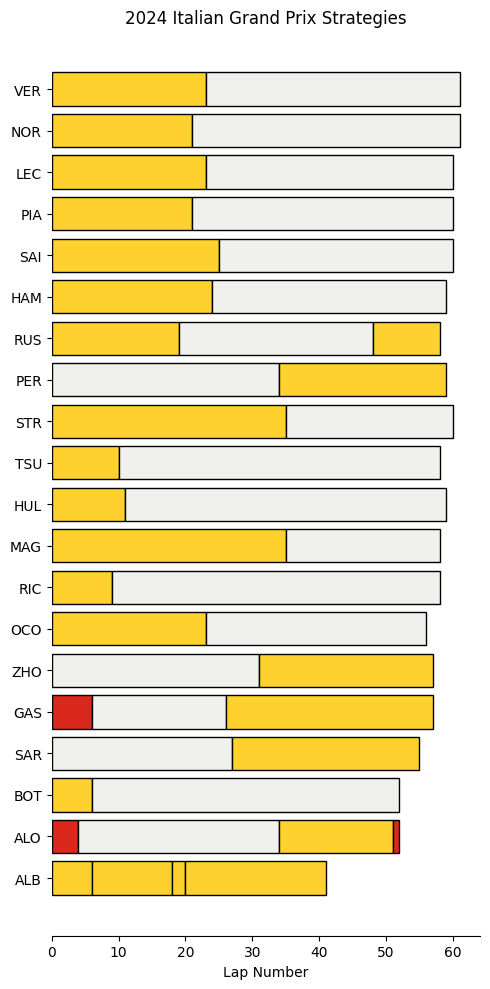

In [60]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
        
plt.title("2024 Italian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']
/usr/local/lib/python3.

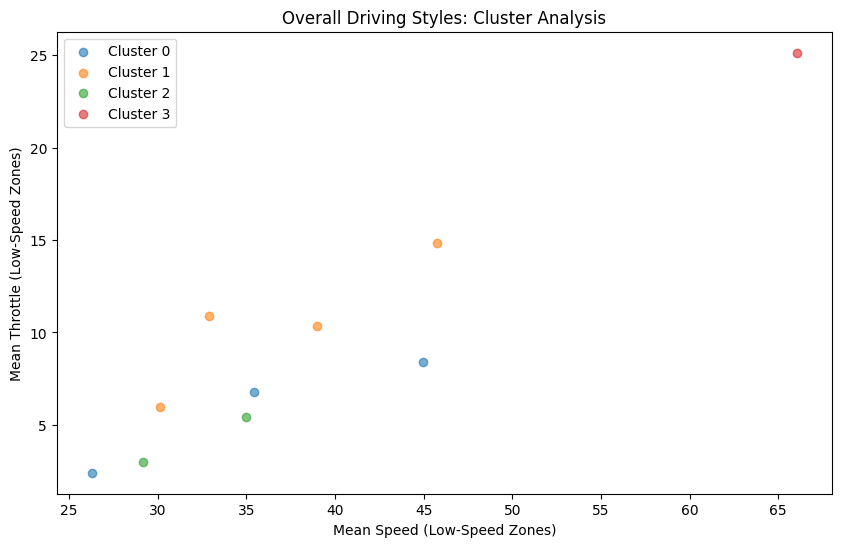

Cluster Centers (Overall Driving Styles):
   Speed_Mean_Low-Speed  Speed_Mean_Mid-Speed  Speed_Mean_High-Speed  \
0             35.551829            121.055107             213.107635   
1             36.932793            121.090216             214.583595   
2             32.069837            122.110127             212.740639   
3             66.041278            117.125737             214.791128   

   Speed_Std_Low-Speed  Speed_Std_Mid-Speed  Speed_Std_High-Speed  \
0            24.900374            18.299136             40.541288   
1            26.691865            18.666983             40.234677   
2            24.611337            18.026068             40.777676   
3            20.982651            20.127117             38.434336   

   Throttle_Mean_Low-Speed  Throttle_Mean_Mid-Speed  Throttle_Mean_High-Speed  \
0                 5.862664                26.551745                 63.421815   
1                10.514386                29.818783                 64.607379   
2       

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


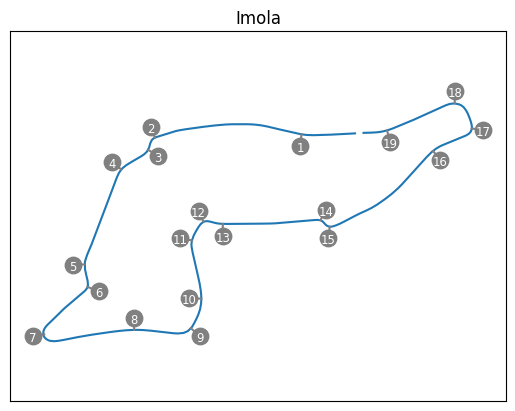

In [17]:
# Importing required libraries
import fastf1
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load a specific race session (example: 2024, 7th race, qualifying)
session = fastf1.get_session(2024, 7, 'Q')
session.load()

# Extract telemetry data for the top ten drivers
top_drivers = ['VER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'PIA', 'PER', 'ALO', 'STR']
driver_telemetry = []

for driver in top_drivers:
    driver_laps = session.laps.pick_driver(driver)
    telemetry = driver_laps.get_telemetry()
    telemetry['Driver'] = driver
    driver_telemetry.append(telemetry)

# Combine telemetry data for all drivers
data = pd.concat(driver_telemetry)

# Segment the circuit into low-speed, mid-speed, and high-speed zones
# Define speed thresholds (example values, adjust based on track data)
data['SpeedCategory'] = pd.cut(data['Speed'], bins=[0, 80, 150, 300], labels=['Low-Speed', 'Mid-Speed', 'High-Speed'])

# Aggregate telemetry data by driver and speed category
segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(
    Speed_Mean=('Speed', 'mean'),
    Speed_Std=('Speed', 'std'),
    Throttle_Mean=('Throttle', 'mean'),
    Throttle_Std=('Throttle', 'std'),
    Brake_Mean=('Brake', 'mean'),
    Brake_Std=('Brake', 'std'),
    Gear_Mean=('nGear', 'mean'),
    Gear_Std=('nGear', 'std'),
    RPM_Mean=('RPM', 'mean'),
    RPM_Std=('RPM', 'std')
).reset_index()

# Pivot the table to make it driver-centric
pivot_data = segmented_features.pivot(index='Driver', columns='SpeedCategory', values=[
    'Speed_Mean', 'Speed_Std',
    'Throttle_Mean', 'Throttle_Std',
    'Brake_Mean', 'Brake_Std',
    'Gear_Mean', 'Gear_Std',
    'RPM_Mean', 'RPM_Std'
])

# Flatten multi-index columns for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

# Fill any missing values (if a driver has no data for a speed category)
pivot_data = pivot_data.fillna(0)

# Define features (X) for clustering
X = pivot_data.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")

# Additional Analysis: Visualizing Corners on Track
# Load the circuit information for visualization
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get an array of shape [n, 2] where n is the number of points and the second axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Define rotation angle (example: align with north)
track_angle = 0  # Adjust if circuit_info.rotation is available

def rotate(point, angle):
    """Rotate a point or set of points around the origin."""
    x, y = point
    cos_theta, sin_theta = np.cos(angle), np.sin(angle)
    x_rot = x * cos_theta - y * sin_theta
    y_rot = x * sin_theta + y * cos_theta
    return x_rot, y_rot

# Rotate and plot the track map
rotated_track = np.array([rotate((x, y), track_angle) for x, y in track])
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

# Iterate over all corners (example: mock corner data, replace with actual circuit_info)
circuit_info = session.get_circuit_info()
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian
    offset_vector = [500, 0]  # arbitrary offset
    offset_angle = corner['Angle'] / 180 * np.pi
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle
    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()


core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']
/usr/local/lib/python3.

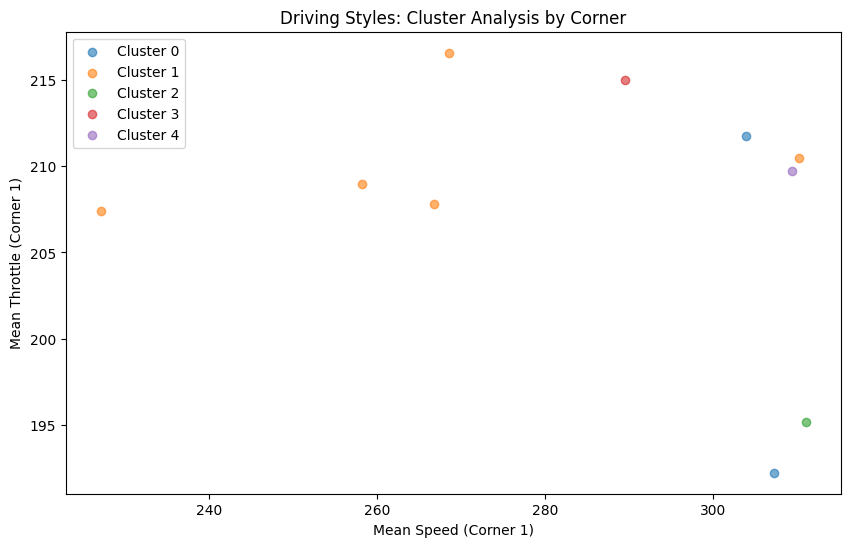

Cluster Centers (Driving Styles by Corner):
   Speed_Mean_1  Speed_Mean_10  Speed_Mean_11  Speed_Mean_12  Speed_Mean_13  \
0    305.562500     202.002353     212.655625     136.226891     145.961538   
1    266.143700     210.242143     210.776379     127.046849     149.514421   
2    311.000000     195.200000     201.200000     115.352941     139.157895   
3    289.500000     215.000000     213.562500     121.035714     133.869565   
4    309.333333     209.730769     207.032258     126.826923     145.809524   

   Speed_Mean_14  Speed_Mean_15  Speed_Mean_16  Speed_Mean_17  Speed_Mean_18  \
0     117.198718      95.921705     231.892727     122.893939     139.812997   
1     108.456063      87.439853     257.712745     114.591128     142.272785   
2     102.882353      83.761905     253.818182     101.480000     132.714286   
3     108.516129      91.187500     229.363636     110.454545     133.863636   
4     117.285714      94.516667     222.315789     117.425532     139.666667   



In [20]:
# Load a specific race session (example: 2024, 7th race, qualifying)
session = fastf1.get_session(2024, 7, 'Q')
session.load()

# Extract telemetry data for the top ten drivers
top_drivers = ['VER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'PIA', 'PER', 'ALO', 'STR']
driver_telemetry = []

for driver in top_drivers:
    driver_laps = session.laps.pick_driver(driver)
    telemetry = driver_laps.get_telemetry()
    telemetry['Driver'] = driver
    driver_telemetry.append(telemetry)

# Combine telemetry data for all drivers
data = pd.concat(driver_telemetry)

# Load the circuit information for corner analysis
circuit_info = session.get_circuit_info()
corners = circuit_info.corners

# Map telemetry data to specific corners based on proximity
corner_data = []
for _, corner in corners.iterrows():
    corner_name = f"{corner['Number']}{corner['Letter']}"
    corner_pos = np.array([corner['X'], corner['Y']])

    # Calculate the distance from each telemetry point to the corner
    data['DistanceToCorner'] = np.sqrt((data['X'] - corner['X'])**2 + (data['Y'] - corner['Y'])**2)

    # Assign telemetry points to the corner if within a threshold distance (e.g., 50 meters)
    corner_telemetry = data[data['DistanceToCorner'] < 50].copy()
    corner_telemetry['Corner'] = corner_name
    corner_data.append(corner_telemetry)

# Combine all corner-specific telemetry data
corner_data = pd.concat(corner_data)

# Aggregate telemetry data by driver and corner
corner_features = corner_data.groupby(['Driver', 'Corner']).agg(
    Speed_Mean=('Speed', 'mean'),
    Throttle_Mean=('Throttle', 'mean'),
    Brake_Mean=('Brake', 'mean'),
    Gear_Mean=('nGear', 'mean'),
    RPM_Mean=('RPM', 'mean')
).reset_index()

# Pivot the table to make it driver-centric
corner_pivot = corner_features.pivot(index='Driver', columns='Corner', values=[
    'Speed_Mean', 'Throttle_Mean', 'Brake_Mean', 'Gear_Mean', 'RPM_Mean'
])

# Flatten multi-index columns for simplicity
corner_pivot.columns = ['_'.join(col).strip() for col in corner_pivot.columns.values]
corner_pivot = corner_pivot.reset_index()

# Fill any missing values (if a driver has no data for a corner)
corner_pivot = corner_pivot.fillna(0)

# Define features (X) for clustering
X = corner_pivot.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
corner_pivot['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis by corner)
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = corner_pivot[corner_pivot['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Corner 1)')
plt.ylabel('Mean Throttle (Corner 1)')
plt.title('Driving Styles: Cluster Analysis by Corner')
plt.legend()
plt.show()

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Driving Styles by Corner):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = corner_pivot[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(5):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")
